In [216]:
"""
file: cov19.ipnb
author: Petri Lamminaho
Simple notebook for Covid19 prediction 
Linear regression and SVR algorithms
Uses data from Kaggle Novel Corona Virus 2019 Dataset
"""

'\nfile: cov19.ipnb\nauthor: Petri Lamminaho\nSimple notebook for Covid19 prediction \nLinear regression and SVR algorithms\nUses data from Kaggle Novel Corona Virus 2019 Dataset\n'

In [217]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random 
import math
import time
import datetime
import operator
plt.style.use('seaborn')

## Loading and preprocessing data 

In [218]:
conf_cases = pd.read_csv('time_series_covid_19_confirmed.csv')
us_conf_cases = pd.read_csv('time_series_covid_19_confirmed_US.csv')
deaths = pd.read_csv('time_series_covid_19_deaths.csv')
us_deaths = pd.read_csv('time_series_covid_19_deaths_US.csv')
recoveded = pd.read_csv('time_series_covid_19_recovered.csv')

In [219]:
conf_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,299,349,367,423,444,484,521,555,607,665
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,333,361,377,383,400,409,416,433,446,467
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,466,501,525,545,564,583,601,601,638,646
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,10,14,16,17,19,19,19,19,19,19


In [220]:
us_conf_cases.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,93,112,113,121,121,128,130,133,133,133
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,6,6,6,6,6,6,6,6,6,6
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,452,475,513,573,620,683,725,788,897,903
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,40,42,43,43,45,45,50,51,51,51


In [221]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,7,7,11,14,14,15,15,18,18,21
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,20,20,21,22,22,23,23,23,23,23
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,130,152,173,193,205,235,256,275,293,313
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,17,18,21,22,23,25,26,26,29,29
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [222]:
us_deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,4,4,4,4,4,4,4,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,1,1,1,1,1,1,1,1,1,1
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,18,20,21,23,24,33,39,42,44,45
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,0,1,1,1,1,1,1,1,1,1


In [223]:
recoveded.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,10,15,18,18,29,32,32,32,32,32
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,99,104,116,131,154,165,182,197,217,232
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,90,90,90,113,237,347,405,460,591,601
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,21,26,31,39,52,58,71,71,128,128
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,4,4,4


## Cases/deaths

In [224]:
counries = list(conf_cases['Country/Region'].unique())


In [225]:
cols = conf_cases.keys()
#conf = conf_cases.loc[:, co]

In [226]:
conf_per_day = conf_cases.loc[:, cols[4]:cols[-1]]
deaths_per_day = deaths.loc[:, cols[4]:cols[-1]]
reco_per_day = recoveded.loc[:, cols[4]:cols[-1]]

In [227]:
conf_per_day.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20
0,0,0,0,0,0,0,0,0,0,0,...,299,349,367,423,444,484,521,555,607,665
1,0,0,0,0,0,0,0,0,0,0,...,333,361,377,383,400,409,416,433,446,467
2,0,0,0,0,0,0,0,0,0,0,...,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983
3,0,0,0,0,0,0,0,0,0,0,...,466,501,525,545,564,583,601,601,638,646
4,0,0,0,0,0,0,0,0,0,0,...,10,14,16,17,19,19,19,19,19,19


In [228]:
deaths_per_day.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20
0,0,0,0,0,0,0,0,0,0,0,...,7,7,11,14,14,15,15,18,18,21
1,0,0,0,0,0,0,0,0,0,0,...,20,20,21,22,22,23,23,23,23,23
2,0,0,0,0,0,0,0,0,0,0,...,130,152,173,193,205,235,256,275,293,313
3,0,0,0,0,0,0,0,0,0,0,...,17,18,21,22,23,25,26,26,29,29
4,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [229]:
reco_per_day.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20
0,0,0,0,0,0,0,0,0,0,0,...,10,15,18,18,29,32,32,32,32,32
1,0,0,0,0,0,0,0,0,0,0,...,99,104,116,131,154,165,182,197,217,232
2,0,0,0,0,0,0,0,0,0,0,...,90,90,90,113,237,347,405,460,591,601
3,0,0,0,0,0,0,0,0,0,0,...,21,26,31,39,52,58,71,71,128,128
4,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,4,4,4


In [289]:
num_leatest_days = 10

dates = conf_per_day.keys()
total_cases = []
cases_change_day = []
total_deaths = []
death_change_days =[]
reco_change_days = []
death_rate = []
total_recoved = []
prev_case_sum = 0
prev_death_sum = 0
prev_reco_sum = 0

for i in dates:
    
    cases_sum = conf_per_day[i].sum()
    total_cases.append(cases_sum)
    

    cases_change = cases_sum - prev_case_sum
    cases_change_day.append(cases_change)
    prev_case_sum = cases_sum
    
    
    
    death_sum = deaths_per_day[i].sum()
    total_deaths.append(death_sum)
    
    death_change = death_sum - prev_death_sum
    death_change_days.append(death_change)
    prev_death_sum = death_sum
    
    
    reco_sum = reco_per_day[i].sum()
    total_recoved.append(reco_sum)
    
    reco_change = reco_sum - prev_reco_sum
    reco_change_days.append(reco_change)
    
    death_rate.append(death_sum/cases_sum)


In [231]:
print('Data has', len(total_cases), 'days. Data stars', cols[4], 'and ends', cols[-1] )

Data has 83 days. Data stars 1/22/20 and ends 4/13/20


In [232]:
total_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30794,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76819,
 78572,
 78958,
 79561,
 80406,
 81388,
 82746,
 84112,
 86011,
 88369,
 90306,
 92840,
 95120,
 97886,
 101801,
 105847,
 109821,
 113590,
 118620,
 125875,
 128352,
 145205,
 156101,
 167454,
 181574,
 197102,
 214821,
 242570,
 272208,
 304507,
 336953,
 378235,
 418045,
 467653,
 529591,
 593291,
 660693,
 720140,
 782389,
 857487,
 932605,
 1013466,
 1095917,
 1197408,
 1272115,
 1345101,
 1426096,
 1511104,
 1595350,
 1691719,
 1771514,
 1846679,
 1917319]

In [233]:
print('Total cases wordwide', cases_sum)

Total cases wordwide 1917319


In [234]:
last_ten_days_cases = total_cases[-1] - total_cases[-num_leatest_days]

print("Change in the last ten days cases", last_ten_days_cases)  

Change in the last ten days cases 719911


In [291]:
cases_change_day

[555,
 99,
 287,
 493,
 684,
 809,
 2651,
 588,
 2068,
 1693,
 2111,
 4749,
 3094,
 4011,
 3743,
 3159,
 3597,
 2729,
 3030,
 2612,
 2040,
 419,
 15147,
 6517,
 2145,
 2194,
 2034,
 1878,
 503,
 558,
 622,
 1753,
 386,
 603,
 845,
 982,
 1358,
 1366,
 1899,
 2358,
 1937,
 2534,
 2280,
 2766,
 3915,
 4046,
 3974,
 3769,
 5030,
 7255,
 2477,
 16853,
 10896,
 11353,
 14120,
 15528,
 17719,
 27749,
 29638,
 32299,
 32446,
 41282,
 39810,
 49608,
 61938,
 63700,
 67402,
 59447,
 62249,
 75098,
 75118,
 80861,
 82451,
 101491,
 74707,
 72986,
 80995,
 85008,
 84246,
 96369,
 79795,
 75165,
 70640]

In [292]:
death_change_days

[17,
 1,
 8,
 16,
 14,
 26,
 49,
 2,
 38,
 42,
 46,
 103,
 64,
 66,
 72,
 70,
 85,
 87,
 100,
 107,
 100,
 5,
 253,
 152,
 143,
 104,
 98,
 139,
 115,
 125,
 4,
 207,
 11,
 160,
 79,
 62,
 44,
 58,
 69,
 55,
 89,
 75,
 94,
 94,
 112,
 98,
 244,
 186,
 274,
 353,
 105,
 684,
 415,
 621,
 686,
 779,
 828,
 1134,
 1432,
 1674,
 1678,
 1854,
 2120,
 2556,
 2789,
 3228,
 3454,
 3273,
 3657,
 4525,
 4702,
 6174,
 5804,
 5819,
 4768,
 5191,
 7300,
 6473,
 7117,
 7070,
 5978,
 5588,
 5391]

In [293]:
reco_change_days

[28,
 30,
 36,
 39,
 52,
 61,
 107,
 126,
 143,
 222,
 284,
 472,
 623,
 852,
 1124,
 1487,
 2011,
 2616,
 3244,
 3946,
 4683,
 5150,
 6295,
 8058,
 9395,
 10865,
 12583,
 14352,
 16121,
 18177,
 18890,
 22886,
 23394,
 25227,
 27905,
 30384,
 33277,
 36711,
 39782,
 42716,
 45602,
 48228,
 51170,
 53796,
 55865,
 58358,
 60694,
 62494,
 64404,
 67003,
 68324,
 70251,
 72624,
 76034,
 78088,
 80840,
 83312,
 84975,
 87420,
 91692,
 97899,
 98351,
 108000,
 113787,
 122150,
 130915,
 139415,
 149082,
 164566,
 178034,
 193177,
 210263,
 225796,
 246152,
 260012,
 276515,
 300054,
 328661,
 353975,
 376096,
 402110,
 421722,
 448655]

In [235]:
print("Total recoveded", total_recoved[-1])
print("Recoved percentage", (total_recoved[-1]/cases_sum) * 100)

Total recoveded 448655
Recoved percentage 23.400122775604896


In [236]:
total_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2007,
 2122,
 2247,
 2251,
 2458,
 2469,
 2629,
 2708,
 2770,
 2814,
 2872,
 2941,
 2996,
 3085,
 3160,
 3254,
 3348,
 3460,
 3558,
 3802,
 3988,
 4262,
 4615,
 4720,
 5404,
 5819,
 6440,
 7126,
 7905,
 8733,
 9867,
 11299,
 12973,
 14651,
 16505,
 18625,
 21181,
 23970,
 27198,
 30652,
 33925,
 37582,
 42107,
 46809,
 52983,
 58787,
 64606,
 69374,
 74565,
 81865,
 88338,
 95455,
 102525,
 108503,
 114091,
 119482]

In [237]:
last_ten_days_death = total_deaths[-1] - total_deaths[-num_leatest_days]
print("Change in the last ten days", last_ten_days_death, "deaths")  

Change in the last ten days 54876 deaths


In [238]:
print('Total death count wordwide',death_sum)

Total death count wordwide 119482


In [239]:
reco_sum

448655

In [240]:
death_rate[-1] * 100

6.231722525046693

## Plotting

Text(0, 0.5, 'Cases')

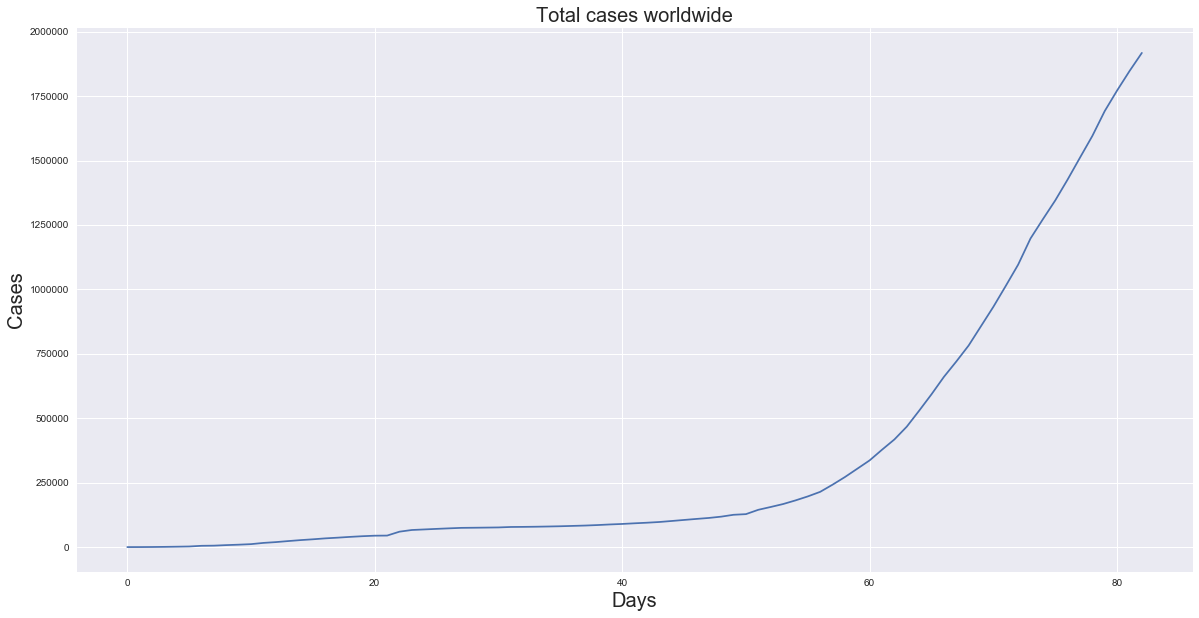

In [241]:
plt.figure(figsize=(20, 10))
plt.plot(total_cases)
plt.title('Total cases worldwide', fontsize=20)
plt.xlabel('Days',fontsize=20)
plt.ylabel('Cases', fontsize=20)

Text(0, 0.5, 'Deaths')

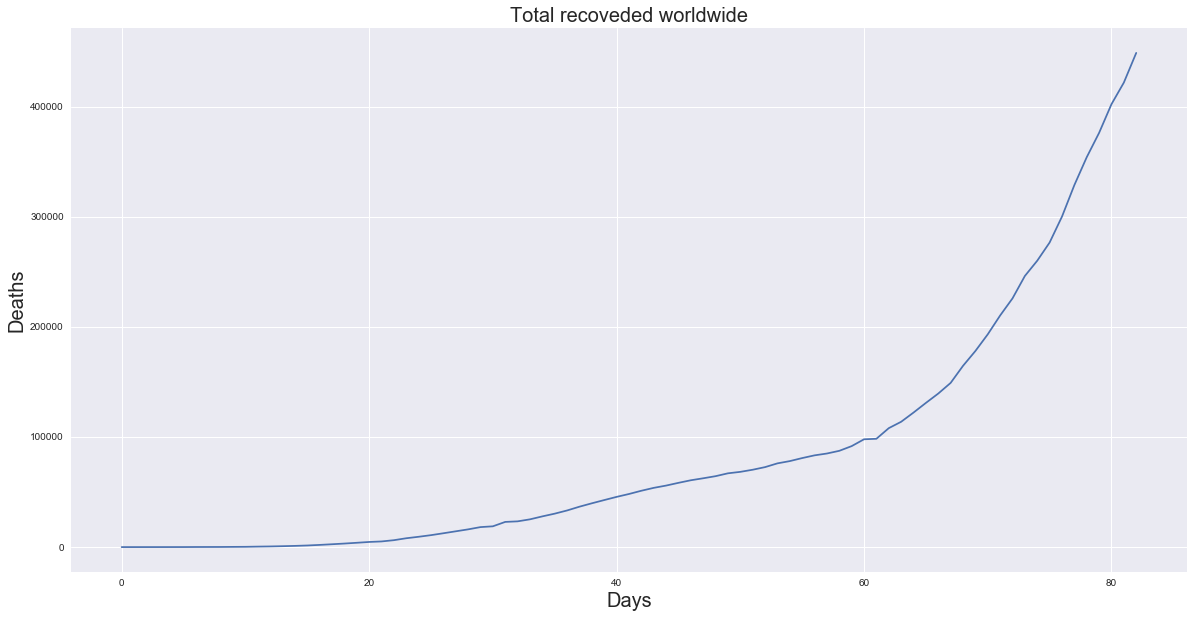

In [242]:
plt.figure(figsize=(20, 10))
plt.plot(total_recoved)
plt.title('Total recoveded worldwide', fontsize=20)
plt.xlabel('Days',fontsize=20)
plt.ylabel('Deaths', fontsize=20)

Text(0, 0.5, 'Deaths')

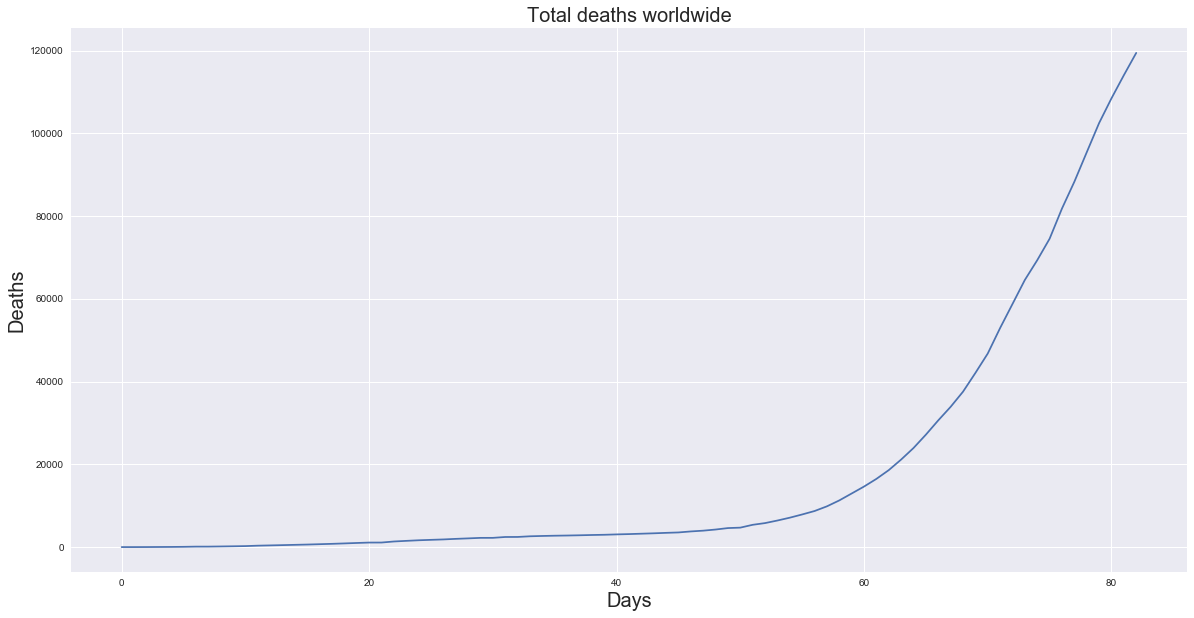

In [243]:
plt.figure(figsize=(20, 10))
plt.plot(total_deaths)
plt.title('Total deaths worldwide', fontsize=20)
plt.xlabel('Days',fontsize=20)
plt.ylabel('Deaths', fontsize=20)

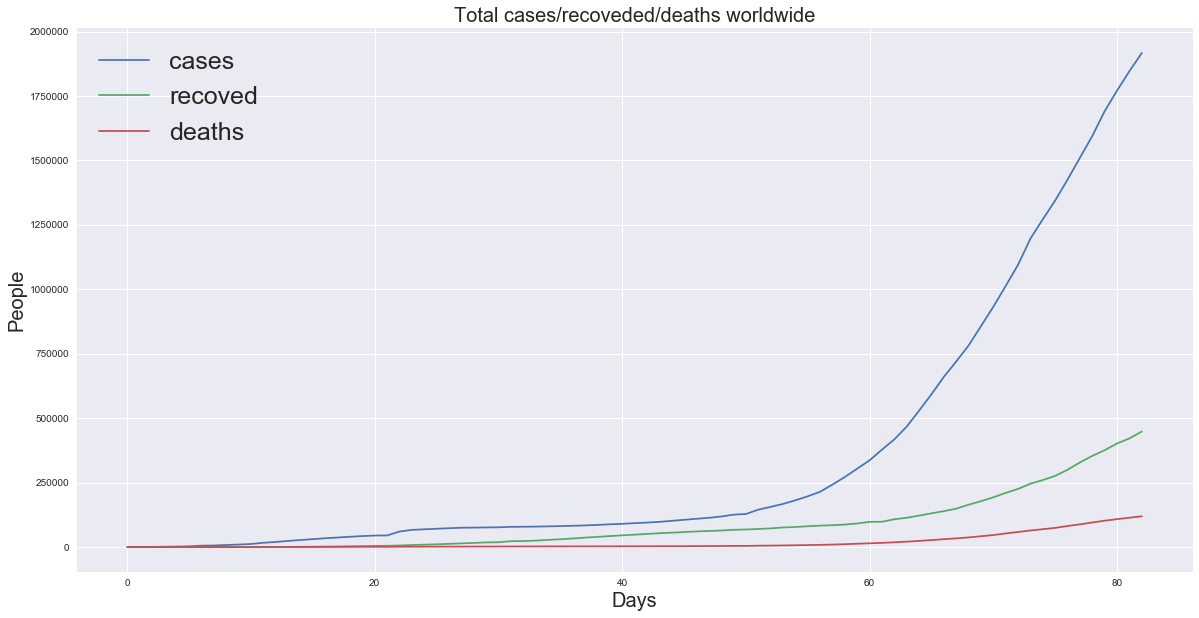

In [244]:
plt.figure(figsize=(20, 10))
plt.plot(total_cases, label="cases")
plt.plot(total_recoved, label="recoved")
plt.plot(total_deaths, label="deaths")
plt.title('Total cases/recoveded/deaths worldwide', fontsize=20)
plt.xlabel('Days',fontsize=20)
plt.ylabel('People', fontsize=20)
plt.legend(loc="upper left", fontsize=25)

Text(0, 0.5, 'case change')

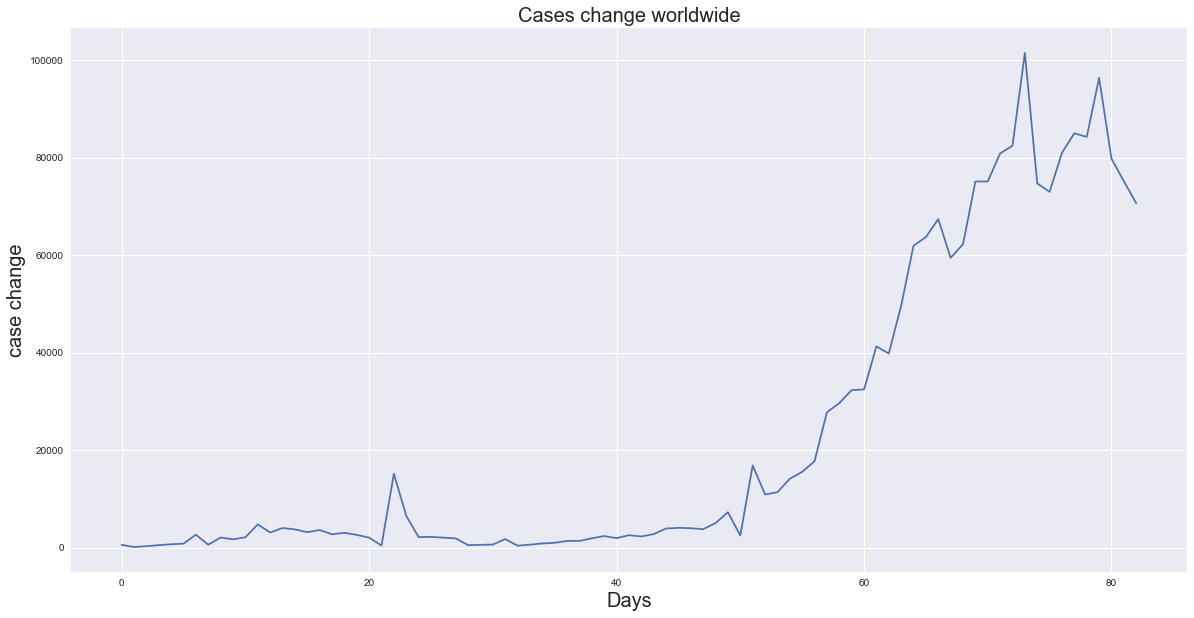

In [294]:
plt.figure(figsize=(20, 10))
plt.plot(cases_change_day)
plt.title('Cases change worldwide', fontsize=20)
plt.xlabel('Days',fontsize=20)
plt.ylabel('case change', fontsize=20)

Text(0, 0.5, 'Deaths change')

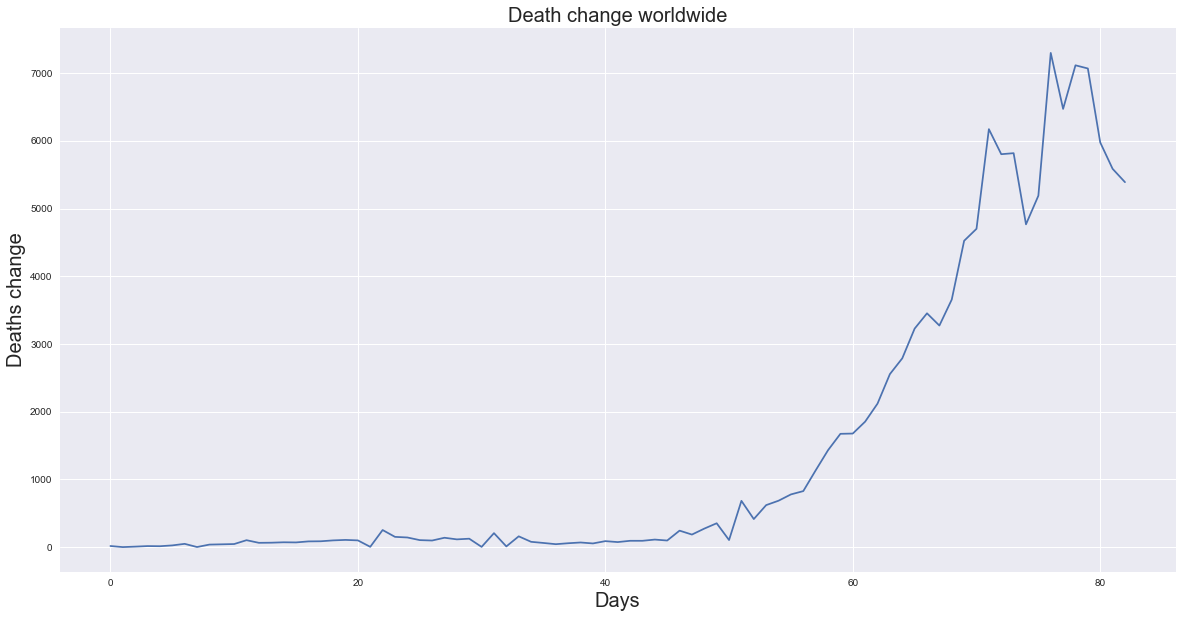

In [297]:
plt.figure(figsize=(20, 10))
plt.plot(death_change_days)
plt.title('Death change worldwide', fontsize=20)
plt.xlabel('Days',fontsize=20)
plt.ylabel('Deaths change', fontsize=20)

Text(0, 0.5, 'Deaths change')

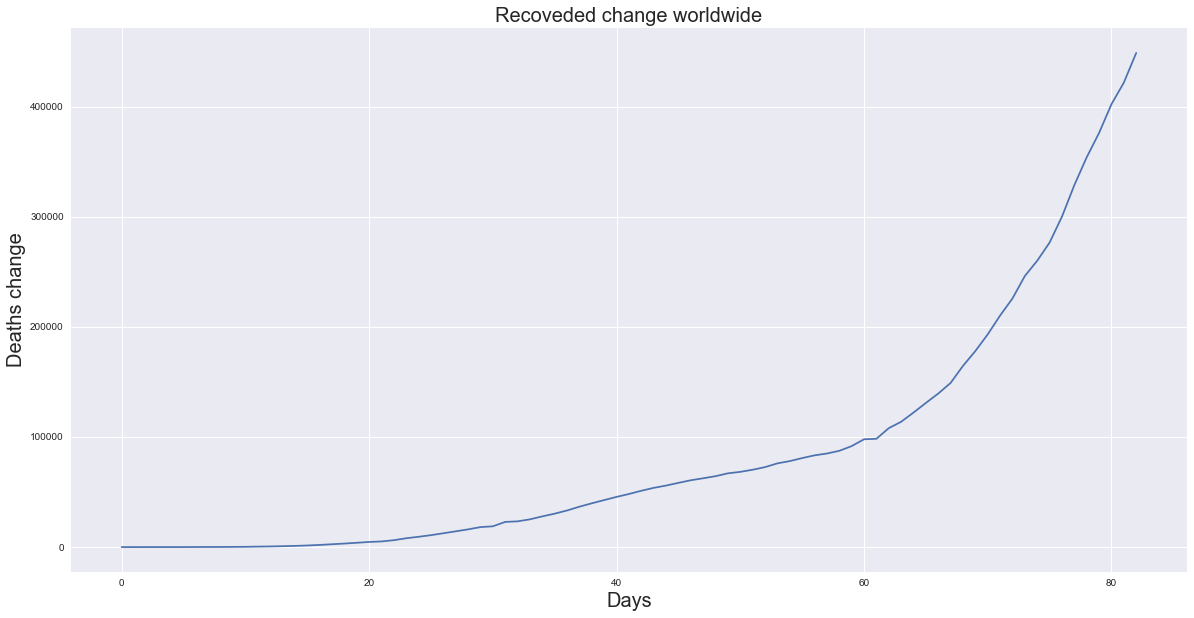

In [298]:
plt.figure(figsize=(20, 10))
plt.plot(reco_change_days)
plt.title('Recoveded change worldwide', fontsize=20)
plt.xlabel('Days',fontsize=20)
plt.ylabel('Deaths change', fontsize=20)

In [245]:
from sklearn.linear_model import LinearRegression
num_future_days= 10 
forecast = np.array([i for i in range(len(dates)+num_future_days)]).reshape(-1, 1)
adj_dates = forecast[:-num_future_days]

In [246]:
start_day = cols[4]
start_date = datetime.datetime.strptime(start_day, '%m/%d/%y')
forecast_dates = []
for i in range(len(forecast)):
    forecast_dates.append((start_date+datetime.timedelta(days=i)).strftime('%m/%d/%y'))
forecast_dates = np.array(forecast_dates)
forecast_dates = forecast_dates.reshape(1, -1)
forecast_dates


array([['01/22/20', '01/23/20', '01/24/20', '01/25/20', '01/26/20',
        '01/27/20', '01/28/20', '01/29/20', '01/30/20', '01/31/20',
        '02/01/20', '02/02/20', '02/03/20', '02/04/20', '02/05/20',
        '02/06/20', '02/07/20', '02/08/20', '02/09/20', '02/10/20',
        '02/11/20', '02/12/20', '02/13/20', '02/14/20', '02/15/20',
        '02/16/20', '02/17/20', '02/18/20', '02/19/20', '02/20/20',
        '02/21/20', '02/22/20', '02/23/20', '02/24/20', '02/25/20',
        '02/26/20', '02/27/20', '02/28/20', '02/29/20', '03/01/20',
        '03/02/20', '03/03/20', '03/04/20', '03/05/20', '03/06/20',
        '03/07/20', '03/08/20', '03/09/20', '03/10/20', '03/11/20',
        '03/12/20', '03/13/20', '03/14/20', '03/15/20', '03/16/20',
        '03/17/20', '03/18/20', '03/19/20', '03/20/20', '03/21/20',
        '03/22/20', '03/23/20', '03/24/20', '03/25/20', '03/26/20',
        '03/27/20', '03/28/20', '03/29/20', '03/30/20', '03/31/20',
        '04/01/20', '04/02/20', '04/03/20', '04/

In [247]:
latest_cases = conf_cases[dates[-1]] 
latest_deaths = deaths[dates[-1]]
latests_reco = recoveded[dates[-1]]

## Linear regression 

In [248]:
from sklearn.model_selection import train_test_split
X = []
for i in range(len(dates)):
    X.append(i)
X= np.array(X)
X=X.reshape(-1, 1)
#conf_cases = conf_cases.dropna()
y = np.array(total_cases) 


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4)
lr = LinearRegression(normalize=True, fit_intercept=True)

model = lr.fit(X, y)
print(model.score(X_test, y_test)*100)

65.58493726386962


## Plotting linear regression 

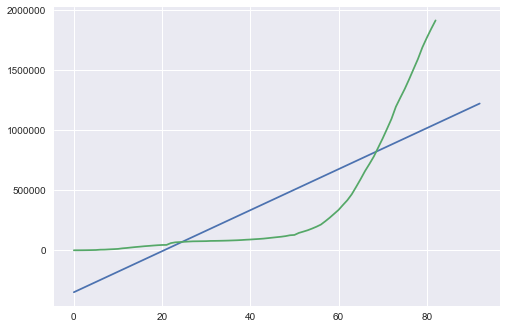

In [249]:
linear_prediction = model.predict(forecast)
plt.plot(forecast, linear_prediction)
plt.plot(adj_dates,total_cases)

# SVM

In [250]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=500)

kernel = ['poly', 'sigmoid', 'rbf']
c =[0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [ 0.01, 0.1, 1]
shrinking =[True, False]
svm_grid ={'kernel': kernel, 'C': c, 'gamma': gamma, 'epsilon': epsilon, 'shrinking': shrinking }

svm_model =SVR()
svm_search = RandomizedSearchCV(svm_model, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_iter=50, verbose=1)
svm_search.fit(X_train, y_train)
# #print(svm_search.score(X_test, y_test))


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [251]:
svm_search.best_params_

{'shrinking': False, 'kernel': 'poly', 'gamma': 1, 'epsilon': 0.1, 'C': 10}

In [252]:
svm_conf = svm_search.best_estimator_
svm_pred = svm_conf.predict(forecast)

In [253]:
svm_conf

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='poly', max_iter=-1, shrinking=False, tol=0.001, verbose=False)

## Plotting SVM 

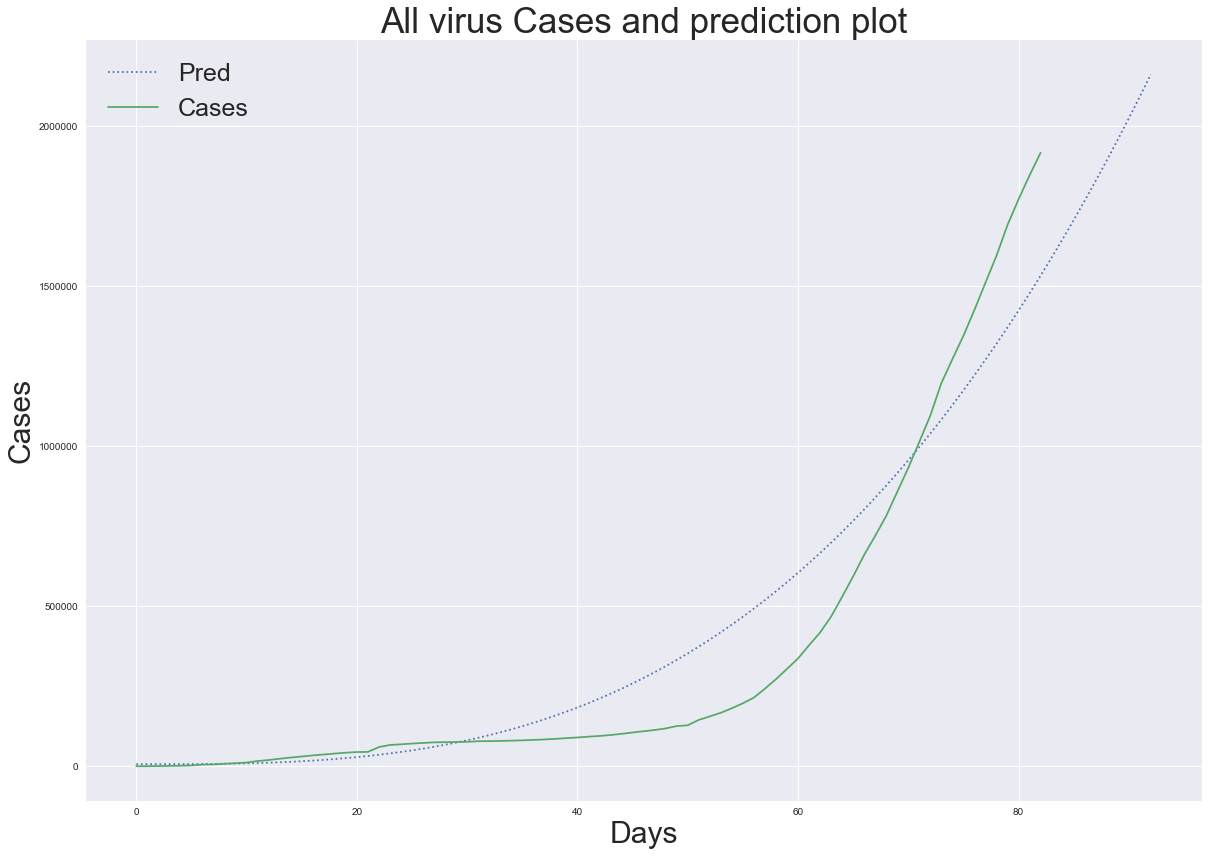

In [254]:
plt.figure(figsize=(20,14))
plt.title("All virus Cases and prediction plot", size=35)
plt.plot(forecast, svm_pred, label="Pred", linestyle="dotted")
plt.plot(adj_dates, total_cases, label="Cases")
plt.xlabel("Days", size=30)
plt.ylabel("Cases", size=30)
plt.legend(loc="upper left", fontsize=25)

In [255]:
svm_pred

array([   6816.57328447,    6819.34150075,    6838.71901467,
          6891.31512394,    6993.73912605,    7162.60031887,
          7414.50800022,    7766.07146724,    8233.90001711,
          8834.60294946,    9584.78955969,   10501.06914743,
         11600.05101045,   12898.34444078,   14412.55874666,
         16159.30321535,   18155.18714555,   20416.81985124,
         22960.81060442,   25803.76871904,   28962.30348619,
         32453.0242122 ,   36292.54018816,   40497.46070512,
         45084.39509233,   50069.95258745,   55470.74253496,
         61303.37423357,   67584.45698198,   74330.60004839,
         81558.41273149,   89284.50434526,   97525.48417314,
        106297.96159013,  115618.54581865,  125503.84611162,
        135970.47184404,  147035.03226885,  158714.13676103,
        171024.39445146,  183982.41489824,  197604.80729326,
        211908.18070635,  226909.1446956 ,  242624.30851396,
        259070.28141435,  276263.6726497 ,  294221.09171709,
        312959.14774736,

## Situation by country

In [305]:
cases_in_coutry = []
zero_casese = []
for i in counries:
    cases = latest_cases[conf_cases['Country/Region']==i].sum()
    if cases > 0:
        cases_in_coutry.append(cases)
    else:
        zero_casese.append(i)

counries = [k for k, v in sorted(zip(counries, cases_in_coutry), key=operator.itemgetter(1),reverse=True)]
for i in range(len(counries)):
     cases_in_coutry[i] = latest_cases[conf_cases['Country/Region']==counries[i]].sum()
    #cases_in_coutry[i] = latest_cases[conf_cases{'Country/Region'}==countries[i]].sum()

In [306]:
print("Cases by countries")
print()
for i in range(len(counries)):
    print(f'{counries[i]}: {cases_in_coutry[i]} cases')

Cases by countries

US: 580619 cases
Spain: 170099 cases
Italy: 159516 cases
France: 137875 cases
Germany: 130072 cases
United Kingdom: 89570 cases
China: 83213 cases
Iran: 73303 cases
Turkey: 61049 cases
Belgium: 30589 cases
Netherlands: 26710 cases
Switzerland: 25688 cases
Canada: 25679 cases
Brazil: 23430 cases
Russia: 18328 cases
Portugal: 16934 cases
Austria: 14041 cases
Israel: 11586 cases
Sweden: 10948 cases
Ireland: 10647 cases
Korea, South: 10537 cases
India: 10453 cases
Peru: 9784 cases
Ecuador: 7529 cases
Chile: 7525 cases
Japan: 7370 cases
Poland: 6934 cases
Romania: 6633 cases
Norway: 6603 cases
Denmark: 6513 cases
Australia: 6351 cases
Czechia: 6059 cases
Pakistan: 5496 cases
Saudi Arabia: 4934 cases
Philippines: 4932 cases
Malaysia: 4817 cases
Mexico: 4661 cases
Indonesia: 4557 cases
United Arab Emirates: 4521 cases
Serbia: 4054 cases
Panama: 3400 cases
Luxembourg: 3292 cases
Qatar: 3231 cases
Dominican Republic: 3167 cases
Ukraine: 3102 cases
Finland: 3064 cases
Belarus

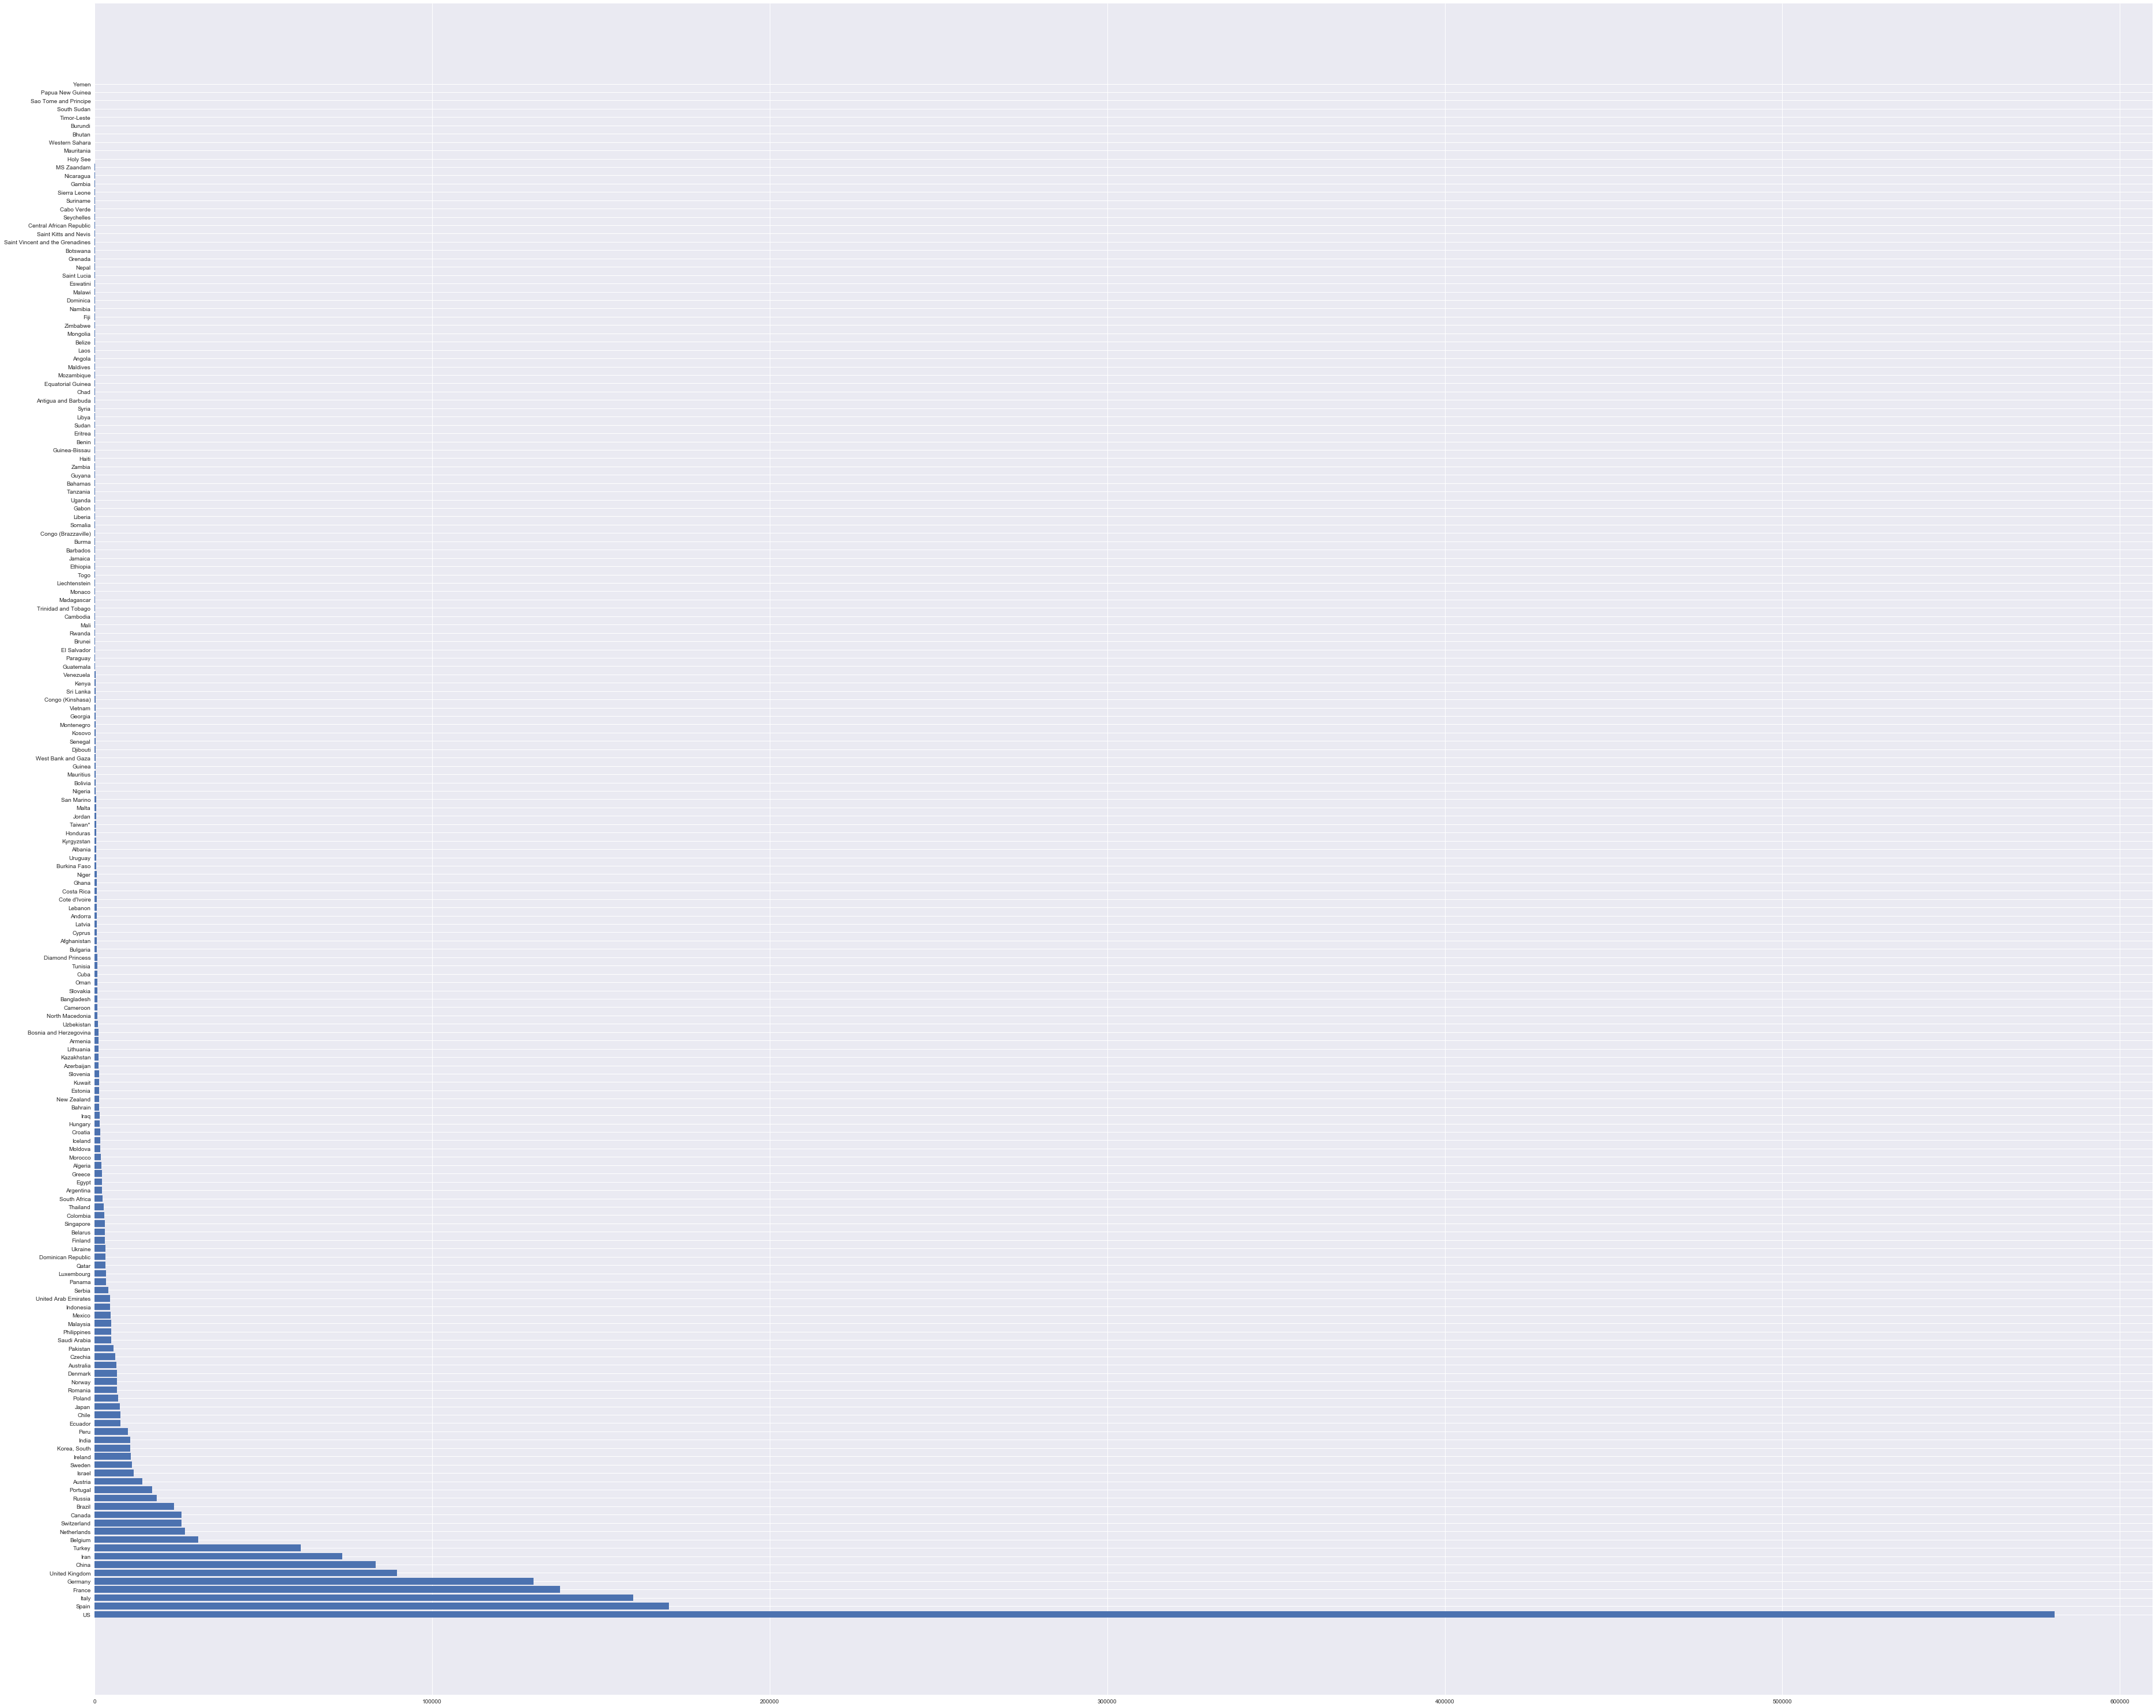

In [307]:
plt.figure(figsize=(64,54))
plt.barh(counries, cases_in_coutry)
plt.show()

In [336]:
def get_country_cases_data(df, country):
    
    one_country_df=df.loc[df['Country/Region']==country]
    one_country_df.set_index=False
    one_country_df = one_country_df.loc[:, cols[4]:cols[-1]]
    return one_country_df
    

In [345]:
country = 'Finland'
df_country_cases = get_country_cases_data(conf_cases,country)
df_deaths_cases = get_country_cases_data(deaths, country)
df_reco = get_country_cases_data(recoveded, country)

In [373]:
dates = df_country_cases.keys()
total_cases_country = []
total_deaths_country = []
death_rate_country = []
total_recoved_country = []
cases_change_country = []
death_change_country = []
reco_change_country = []
prev_case_sum = 0
prev_death_sum = 0
prev_reco_sum = 0

for i in dates:
    cases_sum = df_country_cases[i].sum()
    total_cases_country.append(cases_sum)
    country_case_change = cases_sum - prev_case_sum
    cases_change_country.append(country_case_change)
    prev_case_sum = cases_sum
    
    
    
    death_sum = df_deaths_cases[i].sum()
    total_deaths_country.append(death_sum)
    
    country_death_change = death_sum - prev_death_sum
    death_change_country.append(country_death_change)
    prev_death_sum = death_sum
    
    reco_sum = df_reco[i].sum()
    total_recoved_country.append(reco_sum)
    
    country_reco_change = reco_sum - prev_reco_sum
    reco_change_country.append(country_reco_change)
    prev_reco_sum = reco_sum
    
    
    death_rate_country.append(death_sum/cases_sum)
    


C:\Users\Petri\Anaconda3\envs\newenv\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in longlong_scalars


In [374]:
print("Cases per day")
print(country) 
print(total_cases_country)

Cases per day
Finland
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 6, 6, 6, 6, 12, 15, 15, 23, 30, 40, 59, 59, 155, 225, 244, 277, 321, 336, 400, 450, 523, 626, 700, 792, 880, 958, 1041, 1167, 1240, 1352, 1418, 1446, 1518, 1615, 1882, 1927, 2176, 2308, 2487, 2605, 2769, 2905, 2974, 3064]


Text(0, 0.5, 'Cases')

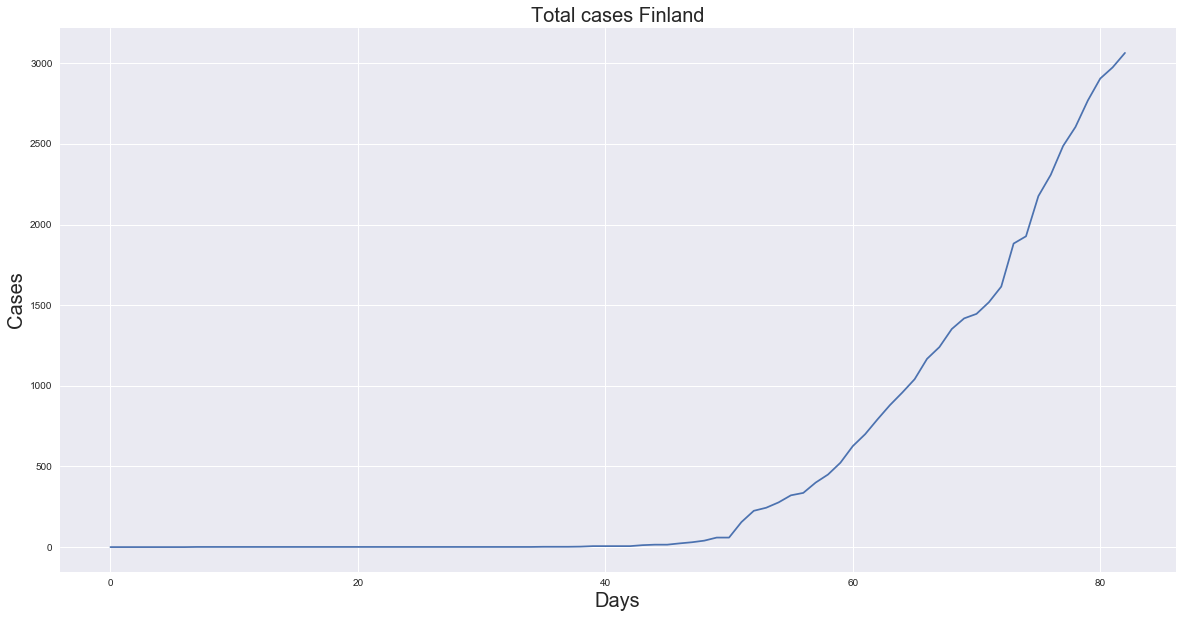

In [349]:
plt.figure(figsize=(20, 10))
plt.plot(total_cases_country)
plt.title('Total cases '+country, fontsize=20)
plt.xlabel('Days',fontsize=20)
plt.ylabel('Cases', fontsize=20)

In [351]:
print('Total cases in', country,':', cases_sum)
last_ten_days_cases = total_cases_country[-1] - total_cases_country[-num_leatest_days]

print("Change in the last ten days", last_ten_days_cases, "cases")  
print(last_ten_days_cases/total_cases_country[-1]*100,'%')


Total cases in Finland : 3064
Change in the last ten days 1182 cases
38.577023498694516 %


In [360]:
print("Change cases per day ")
print(country) 
print(cases_change_country)

Change cases per day 
Finland
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 3, 0, 0, 0, 6, 3, 0, 8, 7, 10, 19, 0, 96, 70, 19, 33, 44, 15, 64, 50, 73, 103, 74, 92, 88, 78, 83, 126, 73, 112, 66, 28, 72, 97, 267, 45, 249, 132, 179, 118, 164, 136, 69, 90]


Text(0, 0.5, 'Change')

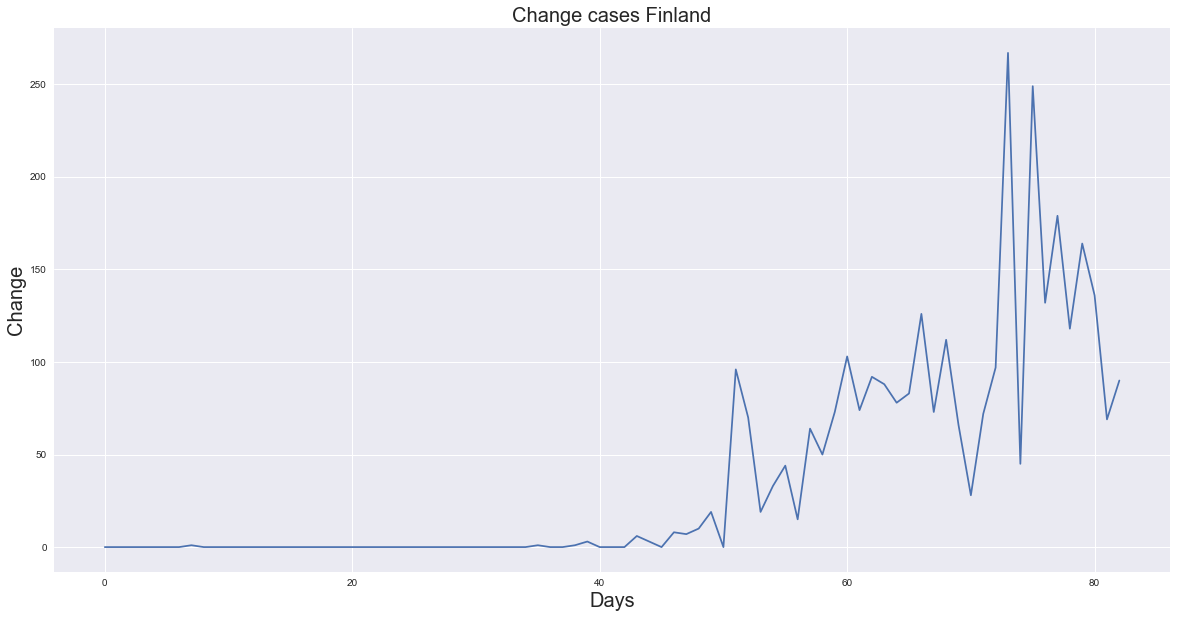

In [362]:
plt.figure(figsize=(20, 10))
plt.plot(cases_change_country)
plt.title('Change cases '+country, fontsize=20)
plt.xlabel('Days',fontsize=20)
plt.ylabel('Change', fontsize=20)

In [369]:
print("Total deaths")
print(country) 
print(total_deaths_country)

Total deaths
Finland
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 5, 7, 9, 11, 13, 17, 17, 19, 20, 25, 28, 27, 34, 40, 42, 48, 49, 56, 59]


Text(0, 0.5, 'Deaths')

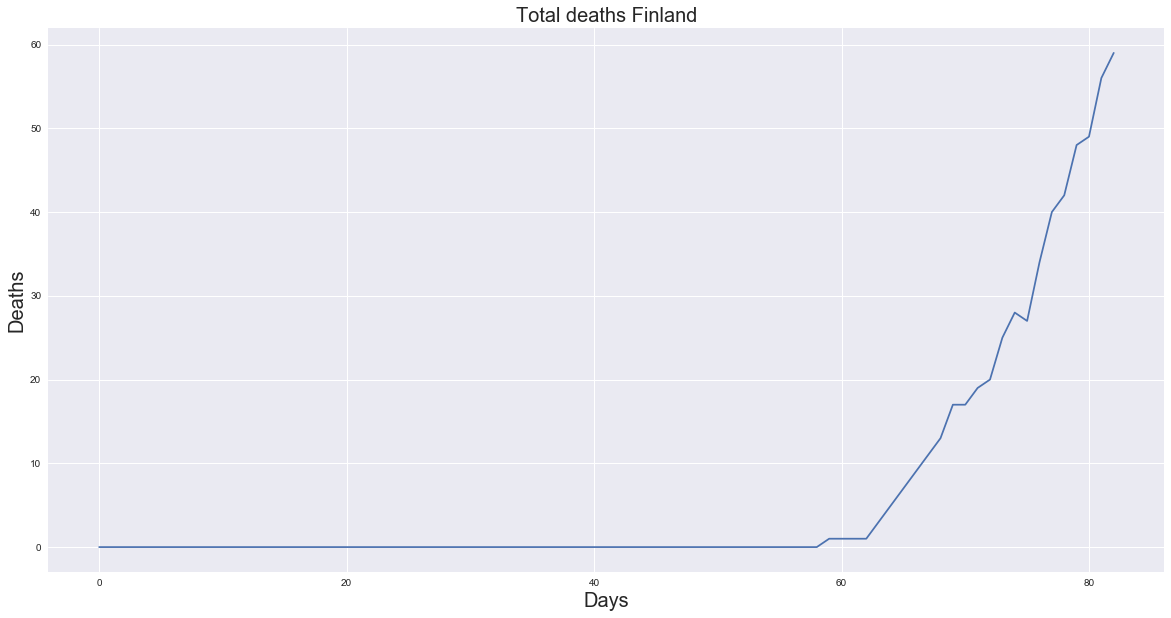

In [352]:
plt.figure(figsize=(20, 10))
plt.plot(total_deaths_country)
plt.title('Total deaths '+country, fontsize=20)
plt.xlabel('Days',fontsize=20)
plt.ylabel('Deaths', fontsize=20)

In [370]:
print("Change deaths per day ")
print(country) 
print(death_change_country)

Change deaths per day 
Finland
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 4, 0, 2, 1, 5, 3, -1, 7, 6, 2, 6, 1, 7, 3]


Text(0, 0.5, 'Deaths')

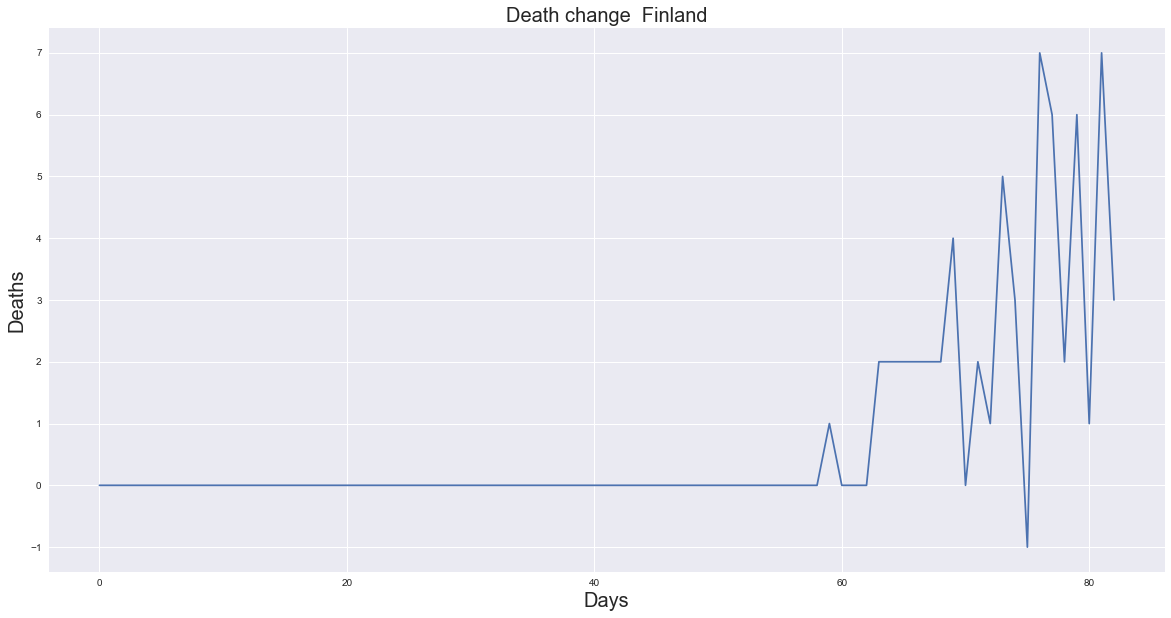

In [375]:
plt.figure(figsize=(20, 10))
plt.plot(death_change_country)
plt.title('Death change  '+country, fontsize=20)
plt.xlabel('Days',fontsize=20)
plt.ylabel('Deaths', fontsize=20)

In [366]:
print('Total deaths in', country,':', death_sum)
print('Death rate in ', country,':', death_rate_country[-1]*100)
last_ten_days_deaths = total_deaths_country[-1] - total_deaths_country[-num_leatest_days]
print("Deaths in the last ten days", last_ten_days_deaths)
print(last_ten_days_deaths/total_deaths_country[-1]*100,'%')

Total deaths in Finland : 59
Death rate in  Finland : 1.925587467362924
Deaths in the last ten days 34
57.6271186440678 %


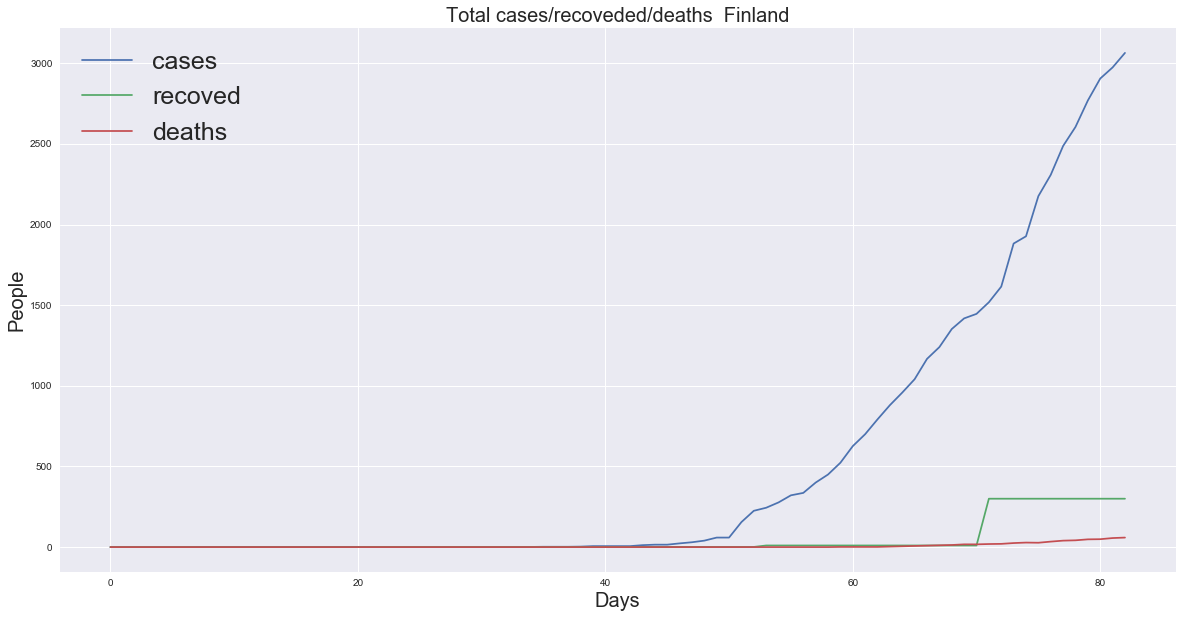

In [371]:
plt.figure(figsize=(20, 10))
plt.plot(total_cases_country, label="cases")
plt.plot(total_recoved_country, label="recoved")
plt.plot(total_deaths_country, label="deaths")
plt.title('Total cases/recoveded/deaths  '+country, fontsize=20)
plt.xlabel('Days',fontsize=20)
plt.ylabel('People', fontsize=20)
plt.legend(loc="upper left", fontsize=25)